In [1]:
import numpy as np
import matplotlib.pylab as plt

# Exercise 5: Markov chains and detailed balance.

## 1. rms deviation.

In [2]:
import random
n_trials = 4000
n_hits = 0
for iteration in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    if x**2 + y**2 < 1.0: 
        n_hits += 1
print (4.0 * n_hits / float(n_trials))

3.183


In [3]:
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
data = []
t = []
for i in range(4,13):
    n_trials = 2**i
    t.append(n_trials)
    s = []
    for run in range(n_runs):
        x = 4.0 * direct_pi(n_trials) / float(n_trials)
        s.append(np.abs(x - np.pi)/n_trials)
    data.append(np.sum(s))

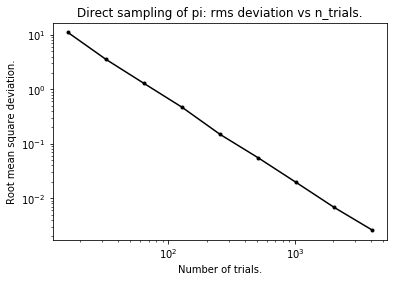

In [4]:
plt.figure()
plt.plot(t,data,".-k")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of trials.")
plt.ylabel("Root mean square deviation.")
plt.title("Direct sampling of pi: rms deviation vs n_trials.")
plt.show()

Using log-log we can see linear behaviour. Acording to that, we can conclude there is an exponential derease of the root mean square deviation as we increase the number of trials. Besides, it converges to 0.

## 2. Other way to compute 𝜋 Markov chain.

1. _First implementation where if an edge is reached and the next move is outside the square, then it will re restarted and that try will not be taken into account._

In [5]:
def square(l, pasos, sigma):
    initial = (10*np.random.random(),10*np.random.random())
    walk = np.zeros((pasos,2))
    walk[0] = initial
    a = initial
    for i in range(1,pasos):
        prob = 4*np.random.random()
        if(prob<1):
            new = (initial[0], initial[1]+sigma)
        if(prob>1 and prob<2):
            new = (initial[0], initial[1]-sigma)
        if(prob>2 and prob<3):
            new = (initial[0]+sigma, initial[1])
        if(prob>3):
            new = (initial[0]-sigma, initial[1])
        if(new[0]>l or new[0]<0 or new[1]>l or new[1]<0):
            new = a
        walk[i] = new
        initial = new
    return walk

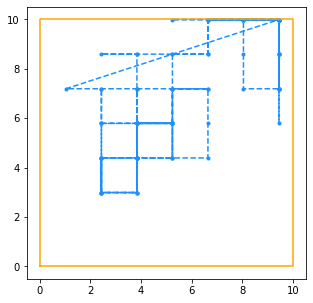

In [6]:
datam = square(10, 100, 1.4)

plt.figure(figsize=(5,5))
plt.plot(datam[:,0],datam[:,1], '.--', color="dodgerblue")
plt.plot([0,0,10,10,0],[0,10,10,0,0], color="orange")
plt.show()

2. _Implement a function as the one before but this time if you reach an edge and you choose a step such that takes you outside the squared you decide to stay in the same pint but you take into account that try._

In [7]:
def square2(l, pasos, sigma):
    initial = (10*np.random.random(),10*np.random.random())
    walk = np.zeros((pasos,2))
    walk[0] = initial
    a = initial
    for i in range(1,pasos):
        prob = 4*np.random.random()
        if(prob<1):
            new = (initial[0], initial[1]+sigma)
        if(prob>1 and prob<2):
            new = (initial[0], initial[1]-sigma)
        if(prob>2 and prob<3):
            new = (initial[0]+sigma, initial[1])
        if(prob>3):
            new = (initial[0]-sigma, initial[1])
        if(new[0]>l or new[0]<0 or new[1]>l or new[1]<0):
            new = initial
        walk[i] = new
        initial = new
    return walk

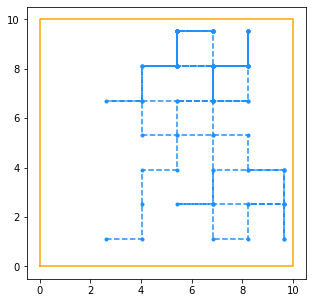

In [8]:
data2 = square2(10, 100,1.4)

plt.figure(figsize=(5,5))
plt.plot(data2[:,0],data2[:,1], '.--', color="dodgerblue")
plt.plot([0,0,10,10,0],[0,10,10,0,0], color="orange")
plt.show()

3. _Compare the results._

There will be more n_hints using the first method due to the condition of returning each time the coordinates reach an edge. Therefore, the rms might increase if we guess pi by using the first implementation.

4. _Use the code implemented in 2, and choose different size of step 𝛿 and compute the rms as before and plot again using log-log scaling, use a number of steps ntrials = 2^4, 2^5,...,2^12._

In [9]:
def sigma1(N,sigma):
    n_hits = 0
    data = square2(10, N, sigma)
    for i in range(N):
        if (data[i,0]-5) ** 2 + (data[i,1]-5) ** 2 < 25:
            n_hits += 1
    return n_hits

def err(met,sigma):
    n_runs = 500
    data = []
    t = []
    for i in range(4,13):
        n_trials = 2**i
        t.append(n_trials)
        s = []
        for run in range(n_runs):
            x = 4.0 * met(n_trials,sigma) / float(n_trials)
            s.append(np.abs(x - np.pi)/n_trials)
        data.append(np.sum(s))
    return data

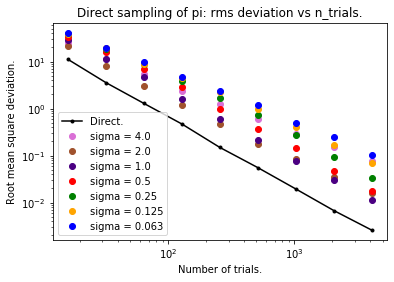

In [12]:
plt.figure()
plt.plot(t,data,".-k", label="Direct.")
plt.scatter(t,err(sigma1,4.0), color='orchid', label="sigma = 4.0")
plt.scatter(t,err(sigma1,2.0), color='sienna', label="sigma = 2.0")
plt.scatter(t,err(sigma1,1.0), color='indigo', label="sigma = 1.0")
plt.scatter(t,err(sigma1,0.5), color='red', label="sigma = 0.5")
plt.scatter(t,err(sigma1,0.25), color='green', label="sigma = 0.25")
plt.scatter(t,err(sigma1,0.125), color='orange', label="sigma = 0.125")
plt.scatter(t,err(sigma1,0.062), color='blue', label="sigma = 0.063")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of trials.")
plt.ylabel("Root mean square deviation.")
plt.title("Direct sampling of pi: rms deviation vs n_trials.")
plt.legend()
plt.show()

- _Which of the values of delta gives the most precise results?_ 𝛿 = 1 and 𝛿 = 2.
- _Explain why VERY small values of delta and VERY large values of delta yield a less precise result than intermediate values._ That's because very small values don't go out a same area so quickly, and very large values keep throwing steps that are beyond the limits of the circle, letting the values always around the edges.
- _Explain in a few words why the error is larger than for the direct sampling algorithm, even for the optimal value of delta._ That happens due to the way in which the random numbers are being generated in each case. For the second algorithm, the next number always depends on the immediately previous value.

## 3. Ball.

In [4]:
actual = np.array([np.random.randint(0,3),np.random.randint(0,3)])
print(0,actual)
for i in range(0,20):
    proba = 4*np.random.random()
    if(actual[0] == 0 and actual[1]==0):
        if(proba<2):
            new = actual
        if(proba>2 and proba<3):
            new = (actual[0]+1,actual[1])
        if(proba>3):
            new = (actual[0],actual[1]+1)
    elif(actual[0] == 2 and actual[1]==0):
        if(proba<2):
            new = actual
        if(proba>2 and proba<3):
            new = (actual[0]-1,actual[1])
        if(proba>3):
            new = (actual[0],actual[1]+1)
    elif(actual[0] == 2 and actual[1]==2):
        if(proba<2):
            new = actual
        if(proba>2 and proba<3):
            new = (actual[0]-1,actual[1])
        if(proba>3):
            new = (actual[0],actual[1]-1)
    elif(actual[0] == 0 and actual[1]==2):
        if(proba<2):
            new = actual
        if(proba>2 and proba<3):
            new = (actual[0]+1,actual[1])
        if(proba>3):
            new = (actual[0],actual[1]-1)
    elif(actual[0] == 0 and actual[1]==1):
        if(proba<1):
            new = actual
        if(proba>1 and proba<2):
            new = (actual[0]+1,actual[1])
        if(proba>2 and proba<3):
            new = (actual[0],actual[1]-1)
        if(proba>3):
            new = (actual[0],actual[1]+1)
    elif(actual[0] == 1 and actual[1]==0):
        if(proba<1):
            new = actual
        if(proba>1 and proba<2):
            new = (actual[0]+1,actual[1])
        if(proba>2 and proba<3):
            new = (actual[0]-1,actual[1])
        if(proba>3):
            new = (actual[0],actual[1]+1)
    elif(actual[0] == 1 and actual[1]==2):
        if(proba<1):
            new = actual
        if(proba>1 and proba<2):
            new = (actual[0]+1,actual[1])
        if(proba>2 and proba<3):
            new = (actual[0]-1,actual[1])
        if(proba>3):
            new = (actual[0],actual[1]-1)
    elif(actual[0] == 2 and actual[1]==1):
        if(proba<1):
            new = actual
        if(proba>1 and proba<2):
            new = (actual[0]-1,actual[1])
        if(proba>2 and proba<3):
            new = (actual[0],actual[1]+1)
        if(proba>3):
            new = (actual[0],actual[1]-1)
    elif(actual[0] == 1 and actual[1]==1):
        if(proba<1):
            new = (actual[0]+1,actual[1])
        if(proba>1 and proba<2):
            new = (actual[0]-1,actual[1])
        if(proba>2 and proba<3):
            new = (actual[0],actual[1]+1)
        if(proba>3):
            new = (actual[0],actual[1]-1)
    print(i+1, new)   
    actual = new

0 [1 1]
1 (1, 0)
2 (2, 0)
3 (2, 0)
4 (1, 0)
5 (1, 0)
6 (2, 0)
7 (2, 1)
8 (2, 1)
9 (2, 2)
10 (2, 2)
11 (2, 2)
12 (2, 2)
13 (2, 2)
14 (1, 2)
15 (1, 2)
16 (2, 2)
17 (2, 2)
18 (1, 2)
19 (0, 2)
20 (0, 2)
